In [1]:
# 读取文件
import pandas as pd
import numpy as np
file_path = './NYCBike1/MoESharedHyper/hyper.csv'
csv_data_parsed = pd.read_csv(file_path, header=None)

Ada = csv_data_parsed.iloc[1, 1:].tolist() 
ratio5 = csv_data_parsed.iloc[2, 1:].tolist()
ratio8 = csv_data_parsed.iloc[3, 1:].tolist()
ratio10 = csv_data_parsed.iloc[4, 1:].tolist()

# Processing the values to remove spaces and percentages, then converting them to numerical values
Ada = np.array([float(value.strip()) for value in Ada])
ratio5 = np.array([float(value.strip()) for value in ratio5])
ratio8 = np.array([float(value.strip()) for value in ratio8])
ratio10 = np.array([float(value.strip()) for value in ratio10])


all = [Ada, ratio5, ratio8, ratio10]
all[0][0]

0.6

In [2]:
mae_list = []
mape_list = []
for i in range(4):
    mae = all[i][0]*all[i][1] + (1-all[i][0])*all[i][2]
    mape = all[i][0]*all[i][3] + (1-all[i][0])*all[i][4]
    mae_list.append(mae)
    mape_list.append(mape)

(mae_list, mape_list)

([4.984, 4.966, 4.922, 4.918], [23.346, 23.183999999999997, 22.88, 23.44])

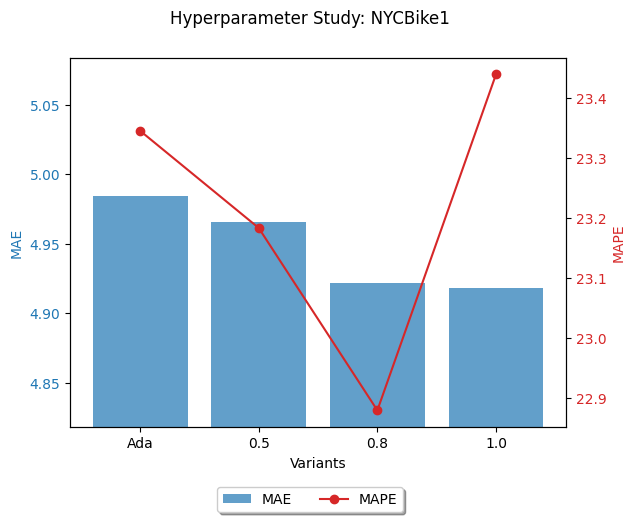

In [3]:
import matplotlib.pyplot as plt
variants = ["Ada", "0.5", "0.8", "1.0"]

# Recreating the figure and axes
fig, ax1 = plt.subplots()

# Bar plot for MAE with adjusted y-axis range
color_mae = 'tab:blue'
ax1.bar(variants, mae_list, color=color_mae, alpha=0.7, label='MAE')
ax1.set_xlabel('Variants')
ax1.set_ylabel('MAE', color=color_mae)
ax1.tick_params(axis='y', labelcolor=color_mae)
ax1.set_ylim([min(mae_list) - 0.1, max(mae_list) + 0.1])  # Setting limits around the min and max of mae_list

# Setting up the second axes for MAPE
ax2 = ax1.twinx()
color_mape = 'tab:red'
ax2.plot(variants, mape_list, color=color_mape, marker='o', linestyle='-', label='MAPE')
ax2.set_ylabel('MAPE', color=color_mape)
ax2.tick_params(axis='y', labelcolor=color_mape)

# Adding title and legends
fig.suptitle('Hyperparameter Study: NYCBike1')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.0), shadow=True, ncol=2)

# Displaying the adjusted plot
plt.show()